## Import Libraries

In [68]:
import re
import csv
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
#import tweet_preprocessor
#import model_script
import warnings
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTETomek,SMOTEENN
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load csv

In [44]:
Ecommerce = pd.read_csv("test_data_hidden.csv")
Ecommerce.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [45]:
Ecommerce.shape

(1000, 8)

In [46]:
Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [47]:
Ecommerce.duplicated().sum()

3

In [48]:
Ecommerce.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

## Data Cleaning

In [49]:
Ecommerce.rename(columns={'reviews.date': 'date', 'reviews.text': 'text', 'reviews.title':'title'})

,name,brand,categories,primaryCategories,date,text,title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive
...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-07T18:06:07.000Z,We love Alexa! Love being able to watch news b...,Awesome,Positive
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-23T00:00:00.000Z,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,2017-01-18T00:00:00.000Z,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-12T00:00:00.000Z,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive


In [50]:
#Remove duplicates
df=Ecommerce.drop_duplicates()



In [51]:
df.duplicated().sum()

0

In [52]:
# Function to clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Initialize stopwords
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Remove non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]
    
    # Rejoin the tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['reviews.text'].apply(clean_text)

df


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,cleaned_text
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive,amazon kindle fire lot free app used one want ...
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive,echo show great addition amazon family work li...
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive,great value best buy bought christmas sale
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive,use mine email facebook game go line also load...
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive,fantastic item person bought love
...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-07T18:06:07.000Z,We love Alexa! Love being able to watch news b...,Awesome,Positive,love alexa love able watch news briefing seein...
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-23T00:00:00.000Z,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,speaker pretty loud love take downside hold ho...
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,2017-01-18T00:00:00.000Z,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,bought yr old said came storage actual storage...
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-12T00:00:00.000Z,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,told sale person could come back week receipt ...


In [53]:
#Handling Negation
def handle_negation(text):
    negation_words = ["not", "no", "n't", "never", "none", "nobody", "nothing", "nowhere"]

    words = text.split()
    negated = False
    result = []

    for word in words:
        if word in negation_words:
            negated = not negated
        else:
            if negated:
                word = "NOT_" + word
            result.append(word)

    return ' '.join(result)

In [54]:
df['cleaned_text'].apply(handle_negation)

0      amazon kindle fire lot free app used one want ...
1      echo show great addition amazon family work li...
2             great value best buy bought christmas sale
3      use mine email facebook game go line also load...
4                      fantastic item person bought love
                             ...                        
995    love alexa love able watch news briefing seein...
996    speaker pretty loud love take downside hold ho...
997    bought yr old said came storage actual storage...
998    told sale person could come back week receipt ...
999    purchased gift mother first tablet love easy n...
Name: cleaned_text, Length: 997, dtype: object

In [55]:
# Create a column privides the length for words 
df['length'] = df['cleaned_text'].str.len()

## EDA

Text(0, 0.5, 'Count')

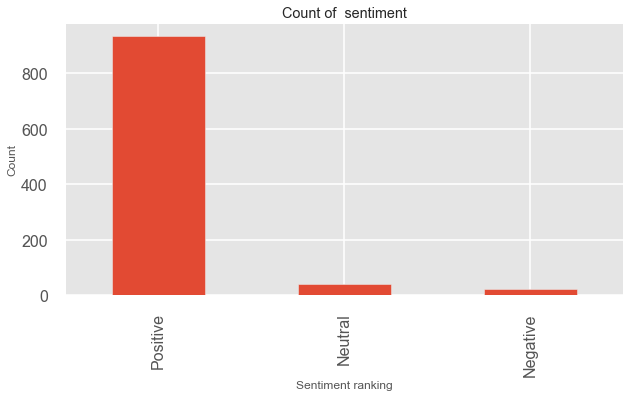

In [56]:
# Sentiment count bar graph
sentiments = df['sentiment'].value_counts().plot(kind='bar', title='Count of  sentiment',
                                                figsize=(10,5))
sentiments.set_xlabel('Sentiment ranking')
sentiments.set_ylabel('Count')

Text(0.5, 1.0, 'Sentiment Pie Chart')

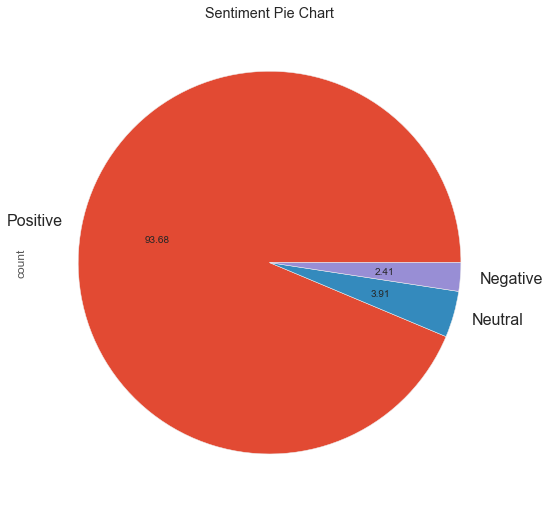

In [57]:
#Sentiment pie chart
df['sentiment'].value_counts().plot.pie(autopct='%.2f')
plt.title('Sentiment Pie Chart')

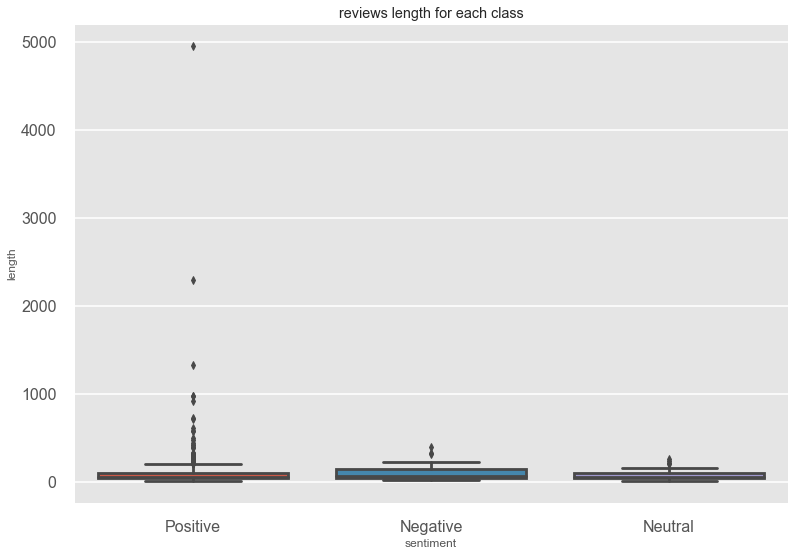

In [58]:
# Plot the distribution of the length tweets for each sentiment using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df)
plt.title('reviews length for each class')
plt.show()

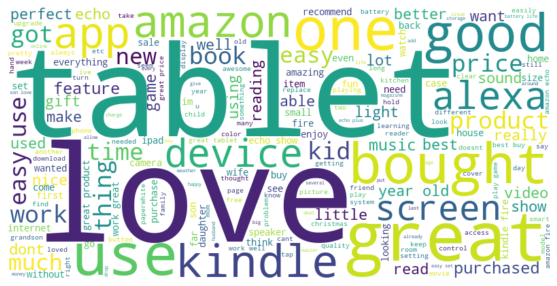

In [59]:
# Combine all text into a single string
text = ' '.join(df['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(df)

# Convert the result to a DataFrame for better readability
TF_IDF= pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

TF_IDF

,brand,categories,cleaned_text,date,length,name,primarycategories,reviews,sentiment,text,title
0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000
1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.802409,0.0,0.0,0.0,0.596775,0.0,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.596775,0.0,0.802409,0.000000
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.596775,0.0,0.000000,0.802409
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000
8,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
9,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [ ]:
# Split data into features and labels
X = df['cleaned_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with TF-IDF and Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00        11
    Positive       0.93      1.00      0.96       278

    accuracy                           0.93       300
   macro avg       0.31      0.33      0.32       300
weighted avg       0.86      0.93      0.89       300



In [67]:
X = df['cleaned_text']
y = df['sentiment']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with TF-IDF and Multinomial Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred))

# Create an imbalanced pipeline that includes SMOTE
imbalanced_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', MultinomialNB())
])

# Train the model with resampling
imbalanced_pipeline.fit(X_train, y_train)

# Predict on the test set again
y_pred_resampled = imbalanced_pipeline.predict(X_test)

# Evaluate the model
accuracy_resampled = metrics.accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy (Resampled): {accuracy_resampled:.2f}')
print('Classification Report (Resampled):')
print(metrics.classification_report(y_test, y_pred_resampled))


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00        11
    Positive       0.93      1.00      0.96       278

    accuracy                           0.93       300
   macro avg       0.31      0.33      0.32       300
weighted avg       0.86      0.93      0.89       300

Accuracy (Resampled): 0.85
Classification Report (Resampled):
              precision    recall  f1-score   support

    Negative       0.25      0.18      0.21        11
     Neutral       0.08      0.18      0.11        11
    Positive       0.94      0.91      0.92       278

    accuracy                           0.85       300
   macro avg       0.42      0.42      0.42       300
weighted avg       0.88      0.85      0.87       300



In [70]:
# Split data into features and labels
X = df['cleaned_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with TF-IDF and Random Forest
rf_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:')
print(metrics.classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.93
Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.00      0.00      0.00        11
    Positive       0.93      1.00      0.96       278

    accuracy                           0.93       300
   macro avg       0.31      0.33      0.32       300
weighted avg       0.86      0.93      0.89       300



In [77]:
# Split data into features and labels
X = df['cleaned_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Create a pipeline with TF-IDF and XGBoost
xgb_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print('XGBoost Classification Report:')
print(metrics.classification_report(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Negative' 'Neutral' 'Positive']